# Convolutional Neural Network

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
from random import randint
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Data Preparation

The images included in the data/cats-and-dogs directory are a random subset of the full cat and dog data set from the following Kaggle competition: http://www.kaggle.com/dogs-vs-cats/data

In [2]:
train_n=500
valid_n=100
test_n=50

In [3]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\dog') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\train\\dog')
    
    for i in random.sample(glob.glob('dog*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\dog')  
os.chdir('../../')

In [4]:
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\cat') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\train\\cat')
    
    for i in random.sample(glob.glob('cat*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\cat')  
os.chdir('../../')

In [5]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\dog') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\valid\\dog')
    
    for i in random.sample(glob.glob('dog*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\dog')  
os.chdir('../../')

In [6]:
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\cat') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\valid\\cat')
    
    for i in random.sample(glob.glob('cat*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\cat')  
os.chdir('../../')

In [7]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\dog') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\test\\dog')
    
    for i in random.sample(glob.glob('dog*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\dog')  
os.chdir('../../')

In [8]:
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\cat') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\test\\cat')
    
    for i in random.sample(glob.glob('cat*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\cat')  
os.chdir('../../')

In [9]:
train_path = 'C:\\Users\\רועי\\\data\\dogs-vs-cats\\train'
test_path = 'C:\\Users\\רועי\\\data\\dogs-vs-cats\\test'

In [10]:
valid_path = 'C:\\Users\\רועי\\\data\\dogs-vs-cats\\valid'

In [11]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path,  target_size=(224,224), classes=['cat','dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [12]:
assert train_batches.n == train_n*2
assert valid_batches.n == valid_n*2
assert test_batches.n == test_n*2
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [13]:
imgs, labels = next(train_batches)

In [14]:
# plot images in the form of a 1 by 10 grid and resize img to 20x20
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

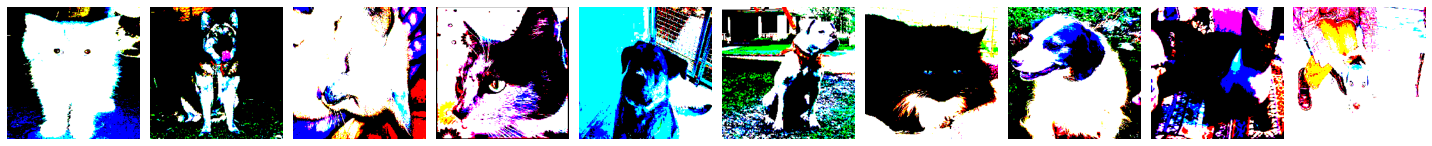

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [15]:
plotImages(imgs)
print(labels)